In [1]:
from control import *

pybullet build time: Oct 14 2023 15:43:53


In [2]:
# from tools import setupwithpybullet, setupwithpybulletandmeshcat, rununtil
from config import DT

# robot, sim, cube = setupwithpybullet()

robot, cube, viz = setupwithmeshcat()
from config import CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET    
from inverse_geometry import computeqgrasppose
from path import computepath, displaypath

q0,successinit = computeqgrasppose(robot, robot.q0, cube, CUBE_PLACEMENT, None)
qe,successend = computeqgrasppose(robot, robot.q0, cube, CUBE_PLACEMENT_TARGET,  None)
path = computepath(q0, qe, CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET, robot, cube, None)
cube_waypoints, pose_waypoints = zip(*path)

velocity_profile = create_linear_velocity_profile(total_duration=4, ramp_time=1, n_samples=1000)
trajectory = resample_path(pose_waypoints, cube_waypoints, velocity_profile, total_time=2, sampling_rate=int(1/DT))

displaypath(robot, trajectory, dt=DT, viz=viz)

Wrapper tries to connect to server <tcp://127.0.0.1:6000>
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [3]:
import matplotlib.pyplot as plt

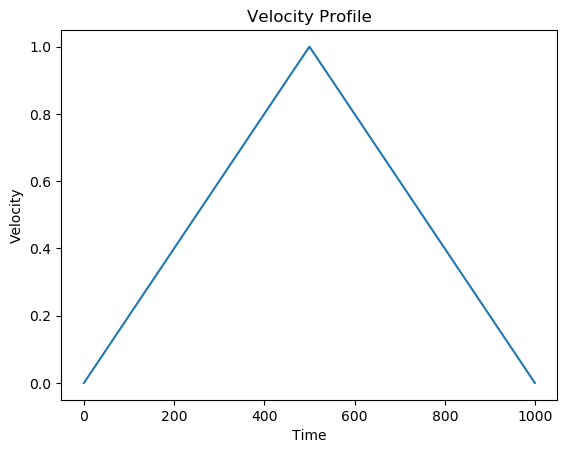

In [4]:
velocity_profile = create_linear_velocity_profile(total_duration=10, ramp_time=5, n_samples=1000)
plt.plot(velocity_profile)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Profile')
plt.show()


In [6]:
len(trajectory)

2000